## CORRELACIÓN Y COVARIANZA

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import researchpy as rp
from scipy.stats import levene

plt.rcParams["figure.figsize"] = (40,40) 
pd.options.display.max_columns = None

import sys
sys.path.append("../../")
from src import funciones as fun
from src import variables as var

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

In [2]:
df = pd.read_pickle('../archivos/coste_vida_limpio.pkl')

In [3]:
df.sample(5)

,country,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
3734,United States,6.75,4.830000,1.15,5.060000,4.390000,10.780000,17.610000,1.17,1.87,8.500000,4.290000,6.000000,2.013471,0.930000,1.19,200.00,76.67,49.672149,10.95,346.40000,8400.00000,2800.00,3617.026327
1715,Algeria,2.89,0.390000,0.68,1.060000,1.210000,3.730000,10.250000,2.23,0.22,10.850000,2.170000,2.170000,0.140000,0.360000,0.23,21.51,36.77,18.990000,3.62,45.81000,361.65000,265.21,278.470000
474,Canada,8.89,3.530000,1.80,4.300000,3.410000,11.430000,11.470000,1.66,1.43,14.820000,2.800000,14.080000,2.040000,1.300000,1.42,140.50,75.81,44.310000,11.12,651.59000,12784.83000,1504.86,3072.150000
3997,India,4.30,1.105113,0.69,0.378153,1.059434,2.435786,4.520546,0.49,0.18,4.915259,0.882791,2.027493,0.610000,0.455265,1.15,12.28,6.14,9.830000,1.84,61.53034,1672.24604,98.25,307.040000
1942,Canada,7.41,2.410000,1.48,2.960000,2.350000,9.510000,17.960000,0.98,0.85,11.120000,2.010000,8.150000,2.410000,1.570000,1.53,83.34,45.40,23.160000,8.89,611.45000,5929.20000,481.75,1922.894957


1- Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

Siempre contando con variables numéricas:

- Covarianza: muestra la dirección de la relación pero no su fuerza (fijarse si es positiva o negativa)

- Correlación: muestra la dirección de la relación y también su fuerza (cuanto más cerca de 1 ó -1 mayor la fuerza de la relación)

2- Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.

In [4]:
numericas = df.select_dtypes(include = np.number)

In [5]:
round(numericas.cov(),3)

,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
mcdonalds,7.136,2.171,0.324,1.875,1.934,7.608,-4.331,0.826,0.868,4.199,1.019,6.446,1.871,1.326,0.599,110.505,9.379170e+02,23.230,7.622,728.962,7.960251e+03,1244.519,2655.919
cappuccino,2.171,1.802,0.172,1.369,0.894,3.782,2.387,0.378,0.634,3.517,0.710,3.226,0.933,0.537,0.108,52.034,1.639230e+02,10.564,3.998,442.278,5.771954e+03,817.420,1673.943
milk,0.324,0.172,0.251,0.137,0.187,0.415,-1.884,0.145,0.071,0.802,0.080,0.440,0.066,0.087,0.015,3.817,1.722770e+02,3.639,0.445,23.235,6.801250e+02,62.923,71.551
rice,1.875,1.369,0.137,2.626,0.900,4.350,6.473,0.490,0.742,3.263,0.771,2.662,0.832,0.534,0.031,51.104,-8.110200e+01,10.223,3.731,416.302,5.892554e+03,892.173,1661.116
eggs,1.934,0.894,0.187,0.900,1.128,3.307,0.069,0.419,0.390,2.003,0.459,2.607,0.691,0.470,0.193,44.017,2.737690e+02,9.579,2.979,301.902,3.809110e+03,549.349,1124.960
chicken,7.608,3.782,0.415,4.350,3.307,19.476,16.902,1.413,1.751,8.416,2.026,9.321,2.927,1.944,0.630,172.874,2.929390e+02,33.893,12.130,1368.755,1.740225e+04,2383.292,4824.287
beef,-4.331,2.387,-1.884,6.473,0.069,16.902,15372.973,3.217,0.529,2.855,0.841,16.266,6.337,3.109,1.464,479.182,-8.998790e+05,8.894,25.502,2557.892,3.259078e+04,1821.753,8494.324
banana,0.826,0.378,0.145,0.490,0.419,1.413,3.217,0.639,0.167,0.845,0.214,1.146,0.289,0.204,0.068,22.115,-1.877200e+01,5.142,1.394,92.441,1.584695e+03,200.298,431.076
water,0.868,0.634,0.071,0.742,0.390,1.751,0.529,0.167,0.455,1.675,0.388,1.504,0.385,0.212,0.014,19.505,7.882800e+01,4.193,1.558,193.855,2.432191e+03,378.311,718.236
wine,4.199,3.517,0.802,3.263,2.003,8.416,2.855,0.845,1.675,20.340,2.323,6.969,1.630,0.998,-0.131,67.233,5.106590e+02,27.399,7.661,924.089,1.319509e+04,1758.917,3559.385


In [6]:
round(numericas.corr(),3)

,mcdonalds,cappuccino,milk,rice,eggs,chicken,beef,banana,water,wine,beer,cigarettes_marlboro,public_transport_ticket,taxi,gasoline,basic,internet,gym_monthly,cinema,preschool,primary_school,apt_3beds_outcentre,monthly_salary
mcdonalds,1.000,0.605,0.242,0.433,0.682,0.645,-0.013,0.387,0.481,0.349,0.423,0.564,0.568,0.606,0.462,0.486,0.048,0.422,0.697,0.539,0.404,0.527,0.618
cappuccino,0.605,1.000,0.256,0.629,0.627,0.638,0.014,0.352,0.700,0.581,0.586,0.562,0.564,0.488,0.166,0.456,0.017,0.382,0.727,0.651,0.583,0.689,0.775
milk,0.242,0.256,1.000,0.169,0.351,0.188,-0.030,0.363,0.209,0.355,0.176,0.205,0.107,0.213,0.060,0.090,0.047,0.353,0.217,0.092,0.184,0.142,0.089
rice,0.433,0.629,0.169,1.000,0.523,0.608,0.032,0.378,0.678,0.447,0.528,0.384,0.417,0.403,0.040,0.371,-0.007,0.306,0.562,0.508,0.493,0.623,0.637
eggs,0.682,0.627,0.351,0.523,1.000,0.705,0.001,0.493,0.545,0.418,0.479,0.574,0.528,0.540,0.374,0.487,0.035,0.438,0.685,0.562,0.486,0.585,0.658
chicken,0.645,0.638,0.188,0.608,0.705,1.000,0.031,0.401,0.588,0.423,0.509,0.494,0.538,0.538,0.294,0.461,0.009,0.373,0.671,0.613,0.535,0.611,0.679
beef,-0.013,0.014,-0.030,0.032,0.001,0.031,1.000,0.032,0.006,0.005,0.008,0.031,0.041,0.031,0.024,0.045,-0.998,0.003,0.050,0.041,0.036,0.017,0.043
banana,0.387,0.352,0.363,0.378,0.493,0.401,0.032,1.000,0.310,0.234,0.297,0.335,0.293,0.311,0.175,0.325,-0.003,0.312,0.426,0.229,0.269,0.283,0.335
water,0.481,0.700,0.209,0.678,0.545,0.588,0.006,0.310,1.000,0.551,0.637,0.521,0.463,0.383,0.043,0.340,0.016,0.302,0.564,0.568,0.489,0.634,0.661
wine,0.349,0.581,0.355,0.447,0.418,0.423,0.005,0.234,0.551,1.000,0.571,0.361,0.293,0.270,-0.060,0.175,0.016,0.295,0.415,0.405,0.397,0.441,0.490


Tras calcular la covarianza y la relación, y fijarnos en las relaciones con nuestra variable dependiente "Basic", observamos que para casi todas las variables independientes la relación es positiva, es decir, a mayor precio en la variable independiente mayor precio en nuestra variable dependiente, exceptuando una de las variables, **internet** (-0.022), siendo sin embargo una relación muy cercana a 0, no resultando significativa.

3- Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

In [7]:
mask = np.triu(np.ones_like(numericas.corr(),dtype = np.bool_))

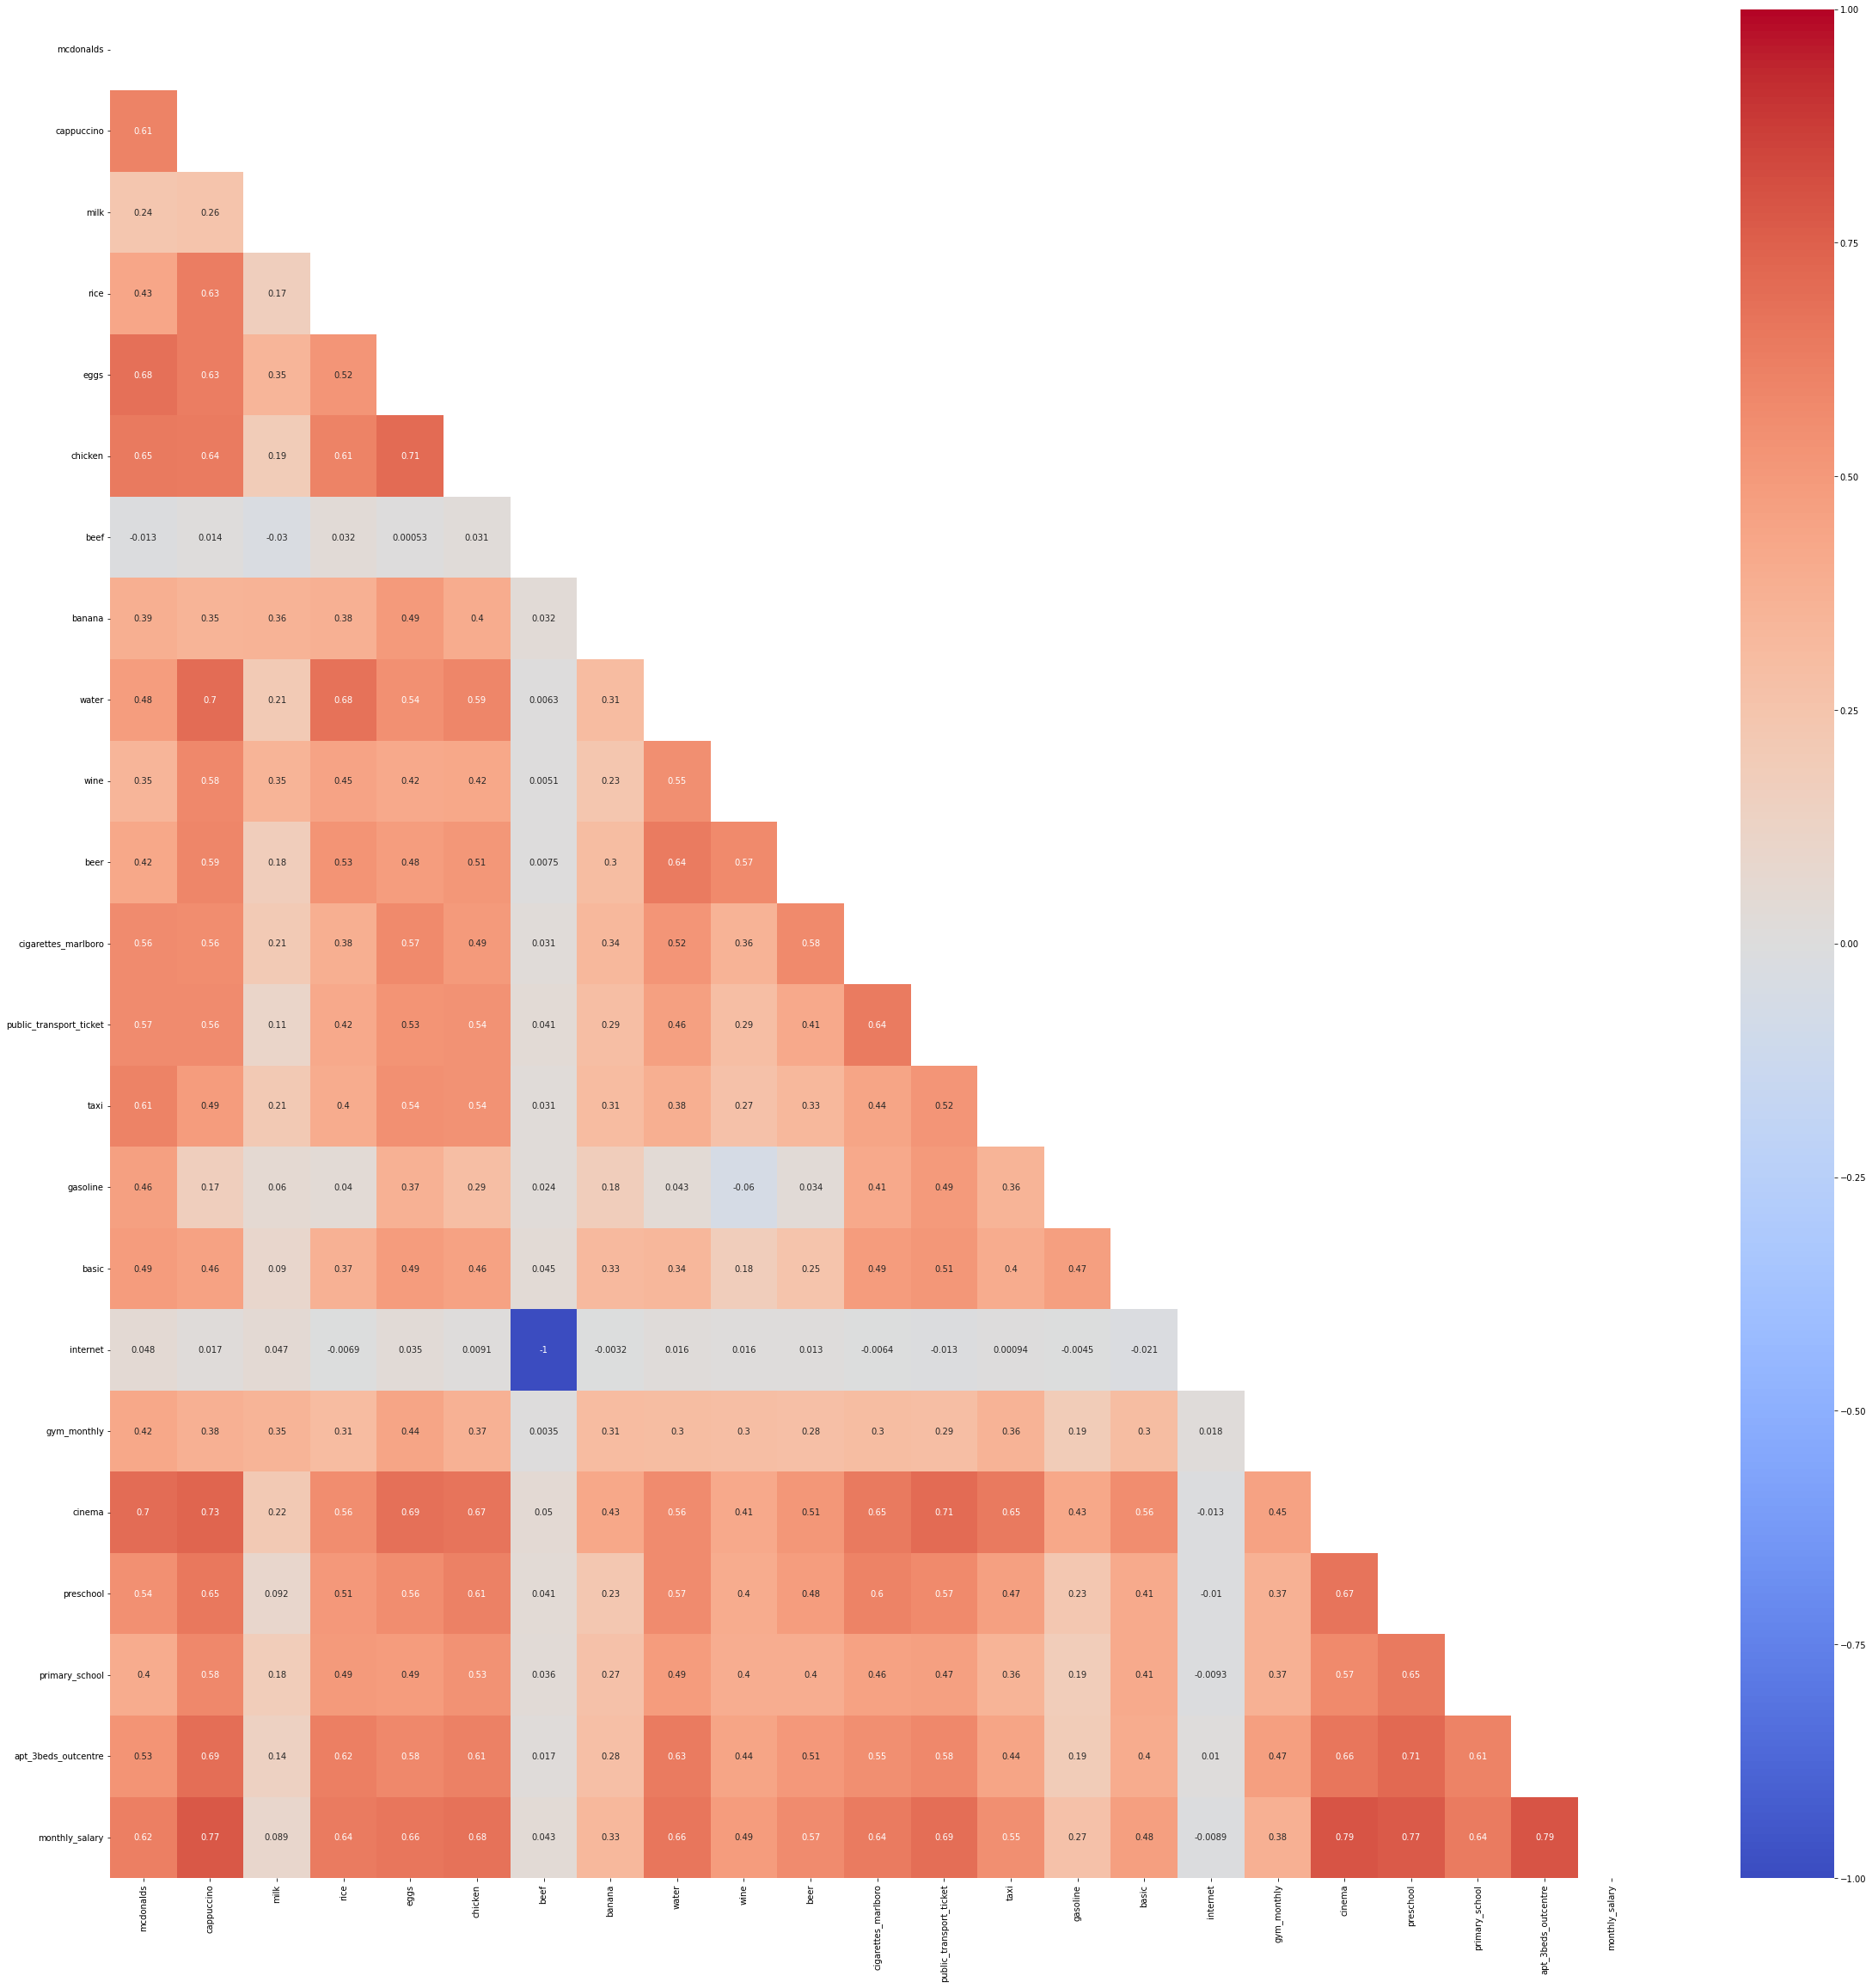

In [11]:
plt.figure(figsize=(40,40))
sns.heatmap(numericas.corr(),
            cmap = 'coolwarm',
            annot = True,
            mask = mask,
            vmin = -1,
            vmax= 1)

plt.savefig('heatmap_beef2.png');

4- Guardad la gráfica del heatmap.

- Guardado :)